<a href="https://colab.research.google.com/github/helenkristanti/Random_Forest_Skripsi/blob/main/APP_06_SKRIPSI_HELEN_ALGORITMA_RANDOM_FOREST_TEXTBLOB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***IMPORT LIBRARIES AND READ DATASET***

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

def load_data():
    data = pd.read_csv('Hasil-Labelling-Data-TextBlob.csv')
    return data

tweet_df = load_data()
tweet_df.head(4)

,created_at,reply_count,retweet_count,favorite_count,tweet,label
0,Fri May 12 03:44:28 +0000 2023,0,3,0,official bts ptd seoul mini photocards jinrmam...,netral
1,Sat May 13 15:11:54 +0000 2023,3,82,668,youth nnbts universe dizisi youth oyuncularınn...,positif
2,Sat May 13 11:55:58 +0000 2023,1,0,0,ya bts hangul bangtan sonyeondan bangtan boys...,netral
3,Wed May 03 02:49:17 +0000 2023,0,1,1,yoongi sowoozoo mini pc set with pajama pcnn n...,netral


In [ ]:
#Mengambil kolom tweet sebagai fitur
tweets = tweet_df['tweet']

#Mengambil kolom Sentiments
labels = tweet_df['label']

# ***PEMROSESAN TEXT MENJADI FITUR NUMERIK***

In [ ]:
#Inisialisasi objek TfidfVectorizer
vectorizer = TfidfVectorizer()

#Mengubah teks menjadi fitur numerik
features = vectorizer.fit_transform(tweets)

# ***SPLITTING DATASET (80/20)***

In [ ]:
#Bagi Data menjadi Set Pelatihan dan Pengujian
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# ***PELATIHAN MODEL RANDOM FOREST***

In [ ]:
#Inisialisasi dan Pelatihan Model Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

# ***EVALUASI  DAN PREDIKSI MODEL RANDOM FOREST***

In [ ]:
#Evaluasi dan Prediksi
y_pred = rf_model.predict(X_test)

# ***CONFUSION MATRIX***

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[  0   5   0]
 [  0 132   0]
 [  0  14   2]]


# ***PLOT CONFUSION MATRIX***

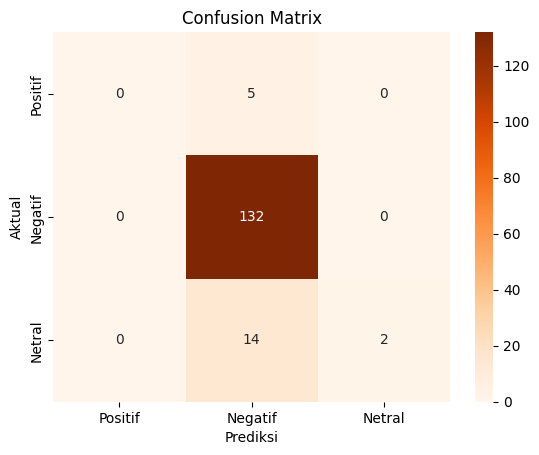

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Plot Confusion Matrix
Sentiments = ['Positif', 'Negatif', 'Netral']
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=Sentiments, yticklabels=Sentiments)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

# ***CLASSIFICATION REPORT CONFUSION MATRIX***

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy_score = accuracy_score(y_test, y_pred) * 100



classification_rep = classification_report(y_test, y_pred)

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

precision_percentage = precision_score(y_test, y_pred, average='weighted') * 100
recall_percentage = recall_score(y_test, y_pred, average='weighted') * 100
f1_percentage = f1_score(y_test, y_pred, average='weighted') * 100

print("ACCURACY:", accuracy)
print("ACCURACY (%):", accuracy_score)
print("------------------------------------")
print("\n")

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("------------------------------------")
print(" ")
print("Precision (%):", precision_percentage)
print("Recall (%):", recall_percentage)
print("F1-score (%):", f1_percentage)
print("------------------------------------")
print("\n")

print("CLASSIFICATION REPORT CONFUSION MATRIX :")
print(" ")
print(classification_rep)
print("---------------------------------------------------------")
print("\n\n")

ACCURACY: 0.8758169934640523
ACCURACY (%): 87.58169934640523
------------------------------------


Precision: 0.8587629312210536
Recall: 0.8758169934640523
F1-score: 0.8280612074695078
------------------------------------
 
Precision (%): 85.87629312210537
Recall (%): 87.58169934640523
F1-score (%): 82.80612074695078
------------------------------------


CLASSIFICATION REPORT CONFUSION MATRIX :
 
              precision    recall  f1-score   support

     negatif       0.00      0.00      0.00         5
      netral       0.87      1.00      0.93       132
     positif       1.00      0.12      0.22        16

    accuracy                           0.88       153
   macro avg       0.62      0.38      0.39       153
weighted avg       0.86      0.88      0.83       153

---------------------------------------------------------





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

# ***DIAGRAM BATANG ACCURACY, RECALL, PRECISION***

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


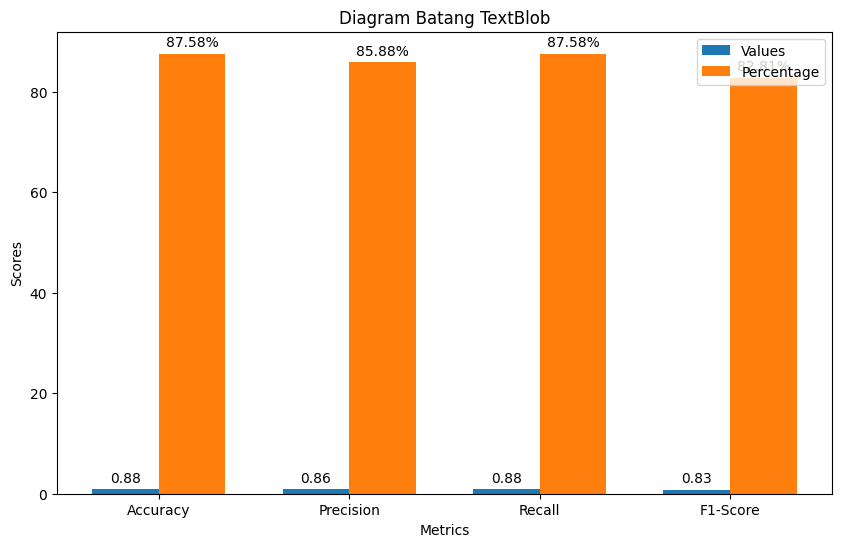

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Menghitung persentase metrik evaluasi
accuracy_percentage = accuracy * 100
precision_percentage = precision * 100
recall_percentage = recall * 100
f1_percentage = f1 * 100

# Daftar metrik evaluasi
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Daftar nilai metrik evaluasi
values = [accuracy, precision, recall, f1]

# Daftar persentase metrik evaluasi
percentage_values = [accuracy_percentage, precision_percentage, recall_percentage, f1_percentage]

# Plot diagram batang
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, values, width, label='Values')
rects2 = ax.bar(x + width/2, percentage_values, width, label='Percentage')

# Menampilkan nilai di atas setiap batang
for rect in rects1:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3),
                textcoords="offset points", ha='center', va='bottom')

# Menampilkan persentase di atas setiap batang
for rect in rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}%', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3),
                textcoords="offset points", ha='center', va='bottom')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Diagram Batang TextBlob')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()
